##### Import & Seed:

In [1]:
import pysindy as ps
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import os

from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
import dill

from Data import SINDy_data
from Data import data
from Data import equations
from Data.auxiliar_functions import SRT_simulation, D_CODE_simulation, set_param_freq, intercept_library_fun, bb_combinations

np.random.seed(999)
directory = 'saved_data'

### Standard:

In [14]:
# Select ODE & settings:

ode_name = 'OscillatingSelkovODE' # help="name of the ode", type=str
ode_param = '0.8,0.1' # help="parameters of the ode (default: None)", type=str, default=None
x_id = 0 # help="ID of the equation to be learned", type=int, default=0
freq = 10 # help="sampling frequency", type=float, default=10
freq_SR = 20
n_sample = 50 # help="number of trajectories", type=int, default=100
noise_sigma = 0.01 # help="noise level (default 0)", type=float, default=0.
alg = 'tv' # help="name of the benchmark", type=str, default='tv', choices=['tv', 'spline', 'gp']
seed = 100 # help="random seed", type=int, default=0
n_seed = 1 # help="random seed", type=int, default=10

ode_param, freq = set_param_freq(ode_param, freq)
ode = equations.get_ode(ode_name, ode_param)
dt = 1 / freq
dim_x = 3
dim_k = 0
time_vector = np.arange(0, ode.T + dt, dt)

In [4]:
# generate data:
X_list, dX_list, param_list, feature_names = SINDy_data.SINDy_data(ode_name, ode_param, freq, n_sample, noise_sigma, dim_x, dim_k)
print(np.shape(X_list), np.shape(dX_list), np.shape(param_list))
print(feature_names)

# ensure existance conditions:
X_list = SINDy_data.existence_conditions(X_list, ode.init_low, n_variables=3)

# save data:
with open('oscillating_selkov_data.pkl', 'wb') as f:
    dill.dump((X_list, dX_list, param_list, feature_names), f)
# file_path = os.path.join(directory, 'selkov_data.pkl')
# with open(file_path, 'wb') as f:
#     dill.dump((X_list, dX_list, param_list, feature_names), f)

(50, 500, 3) (50, 500, 3) (0,)
['X0', 'X1', 'X2']


In [15]:
# additional building blocks -> running SR-T:

print('Equation 1:')
print('')
building_blocks_lambda_0, function_names_0 = SRT_simulation(ode_name, ode_param, 0, freq_SR, n_sample, noise_sigma, alg, seed=seed, n_seed=n_seed, T0=10, T=20)
# print('')
# print('Equation 2:')
# print('')
# building_blocks_lambda_1, function_names_1 = SRT_simulation(ode_name, ode_param, 1, freq, n_sample, noise_sigma, alg, seed=seed, n_seed=n_seed)

with open('oscillating_selkov_bb_0.pkl', 'wb') as f:
    dill.dump((building_blocks_lambda_0, function_names_0), f)
# with open('selkov_bb_1.pkl', 'wb') as f:
#     dill.dump((building_blocks_lambda_1, function_names_1), f)


#3m26s

Equation 1:

Running with: ode_name=OscillatingSelkovODE, ode_param=[0.8, 0.1], x_id=0, freq=20, n_sample=50, noise_sigma=0.01, alg=tv, seed=100, n_seed=1
Dataset shape:  (201, 50, 3)
[1.12328195 1.15434123 1.18631773 1.21966419 1.27156749 1.32430154
 1.39107515 1.44502178 1.51950217 1.57798697 1.64666356 1.7039534
 1.77234017 1.82542853 1.88874954 1.9308879  1.96507975 2.00021805
 2.03098396 2.05182789]
[0.46875225 0.4644864  0.4597805  0.45229244 0.4464162  0.44392441
 0.44308505 0.42924799 0.46015101 0.43110601 0.44637321 0.46073475
 0.45205945 0.44836717 0.45932771 0.46039899 0.47520342 0.47948001
 0.49349268 0.5068575 ]
[ 9.99184413 10.04625037 10.10624251 10.15306412 10.21087385 10.25133061
 10.29806643 10.34400262 10.39448285 10.44770076 10.5001976  10.55031188
 10.59150634 10.64804259 10.70667976 10.74864392 10.79549412 10.8526128
 10.90136751 10.96390814]
Functions set:  {'sub': 1, 'mul': 1, 'add': 1, 'neg': 1, 'sin': 1, 'pow': 1, 'log': 1}
 
    |   Population Average    |   

/Users/grgromano/Documents/polimi/thesis/repos/gplearn/gplearn/functions.py:132: RuntimeWarning: overflow encountered in power
  return np.where(np.logical_and(np.minimum(x1, x2) >= 0, np.maximum(x1, x2) <= 10), np.power(x1, x2), 1000)
/Users/grgromano/Documents/polimi/thesis/repos/gplearn/gplearn/functions.py:132: RuntimeWarning: overflow encountered in power
  return np.where(np.logical_and(np.minimum(x1, x2) >= 0, np.maximum(x1, x2) <= 10), np.power(x1, x2), 1000)


   1     4.65          1104.29       20         0.506313         0.512983      1.41m
   2     4.31          1608.59        4         0.322108         0.319625     59.28s
 
promising programs:
sin(mul(3.139, X2))
sin(mul(3.139, X2))
sin(mul(3.139, X2))
sin(mul(3.139, X2))
sin(mul(3.139, X2))
sin(mul(3.139, X2))
sin(mul(3.139, X2))
sin(mul(3.139, X2))
sin(mul(3.139, X2))
sin(mul(3.139, X2))
sin(mul(3.139, X2))
sin(mul(3.139, X2))
sin(mul(3.139, X2))
sin(mul(3.139, X2))
sin(mul(3.139, X2))
 
   3     4.34          8306.02        4         0.318086         0.355829     39.97s
   4     5.96          9421.71       24         0.246501         0.247137     27.04s
 
promising programs:
sin(mul(3.139, X2))
sin(mul(3.139, X2))
sin(mul(3.139, X2))
sin(mul(3.139, X2))
sin(mul(3.139, X2))
sin(mul(3.139, X2))
sin(mul(3.139, X2))
sin(mul(3.139, X2))
sin(mul(3.139, X2))
sin(mul(3.139, X2))
sin(mul(3.139, X2))
sin(mul(3.139, X2))
sin(mul(3.139, X2))
sin(mul(3.139, X2))
sin(mul(3.139, X2))
 
   5     7.1

In [18]:
# fit and evaluate models, one for each building block:

# upload data:
with open('oscillating_selkov_data.pkl', 'rb') as f:
    X_list, dX_list, param_list, feature_names = dill.load(f)

# upload building blocks:
with open('oscillating_selkov_bb_0.pkl', 'rb') as f:
    building_blocks_lambda, function_names = dill.load(f)

# intercept library:
intercept_library = intercept_library_fun(dim_x+dim_k)
# polynomial library:
polynomial_library = ps.PolynomialLibrary(degree=3, include_bias=False)


errors = []
n_features_vec = []
for i in range(len(building_blocks_lambda)):
    # custom library with building blocks:
    custom_library = ps.CustomLibrary(library_functions=[building_blocks_lambda[i]], function_names=[function_names[i]])
    model = ps.SINDy(feature_names=feature_names, feature_library=custom_library, optimizer=ps.STLSQ(threshold=0.01))
    model.fit(X_list, t=dt, multiple_trajectories=True, x_dot=dX_list)
    print('')
    print('custom library:')
    library_terms = custom_library.get_feature_names(input_features=feature_names)
    for term in library_terms:
        print(term)


    # enlarged library, adding the building block to polynomial library:
    # generalized_library = ps.GeneralizedLibrary(
    #     libraries=[polynomial_library, custom_library],
    #     tensor_array=[[1, 1]] 
    # )
    generalized_library = ps.ConcatLibrary([polynomial_library, custom_library])
    model = ps.SINDy(feature_names=feature_names, feature_library=generalized_library, optimizer=ps.STLSQ(threshold=0.01))
    model.fit(X_list, t=dt, multiple_trajectories=True, x_dot=dX_list)
    print('')
    print('library:')
    library_terms = generalized_library.get_feature_names(input_features=feature_names)
    for term in library_terms:
        print(term)


    # add the intercept:
    final_library = ps.ConcatLibrary([intercept_library, generalized_library])

    # fitting the model:
    model = ps.SINDy(feature_names=feature_names, feature_library=final_library, optimizer=ps.STLSQ(threshold=0.2))
    model.fit(X_list, t=dt, multiple_trajectories=True, x_dot=dX_list)

    # library:
    print('')
    print('library:')
    library_terms = final_library.get_feature_names(input_features=feature_names)
    for term in library_terms:
        print(term)

    # final model:
    print('')
    print('model:')
    model.print()

    # evaluate the model:
    
    #filter too complex models (for sure not correct and likely to crash the code):
    coefficients = model.coefficients()
    lasso_penalty = np.sum(np.abs(coefficients))
    if np.count_nonzero(np.array(model.coefficients())) < 5 and lasso_penalty < 5:

        # enlarging initial range to test model robustness:
        # l = (ode.init_high - ode.init_low)/2 # print(l)
        # init_low = max(ode.init_low - l, 0)
        # init_high = ode.init_high + l #print(init_low, init_high)

        # compute MSE:
        _, mse = SINDy_data.evaluate_RMSE(model, ode, freq, 25, ode.init_high, ode.init_low, dim_k)

        # final evaluation metric:
        alpha = 0.01 # regularization parameter
        error = mse + alpha * lasso_penalty
        print('error:', error)
    else:
        error = 1000
        print('Too complex model')
    
    errors.append(error)
    n_features_vec.append(np.count_nonzero(np.array(model.coefficients())))
    print('')
    

print('errors:', errors)

/Users/grgromano/miniconda3/envs/smart_SINDy/lib/python3.12/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.01) and eliminated all coefficients
  warnings.warn(



custom library:
sin(3.1394689809108645*X2)

library:
X0
X1
X2
X0^2
X0 X1
X0 X2
X1^2
X1 X2
X2^2
X0^3
X0^2 X1
X0^2 X2
X0 X1^2
X0 X1 X2
X0 X2^2
X1^3
X1^2 X2
X1 X2^2
X2^3
sin(3.1394689809108645*X2)

library:
1
X0
X1
X2
X0^2
X0 X1
X0 X2
X1^2
X1 X2
X2^2
X0^3
X0^2 X1
X0^2 X2
X0 X1^2
X0 X1 X2
X0 X2^2
X1^3
X1^2 X2
X1 X2^2
X2^3
sin(3.1394689809108645*X2)

model:
(X0)' = 0.706 1 + -1.033 X0 X1^2 + 0.982 sin(3.1394689809108645*X2)
(X1)' = -0.915 X1 + 1.037 X0 X1^2
(X2)' = 1.000 1


In [20]:
# Final model:

min_error = min(errors)
idxs = [i for i, e in enumerate(errors) if abs(e - min_error) < 0.01]
n_features_vec_2 = [n_features_vec[i] for i in idxs]

if len(idxs) > 1:
    print('Multiple models with similar error, choosing the simplest one')
    print('')
    idx = idxs[np.argmin(n_features_vec_2)]
else:
    idx = idxs[0]


# intercept library:
intercept_library = intercept_library_fun(dim_x+dim_k)
# polynomial library:
polynomial_library = ps.PolynomialLibrary(degree=2, include_bias=False)

# custom library with building blocks:
custom_library = ps.CustomLibrary(library_functions=bbs[idx], function_names=fns[idx])
model = ps.SINDy(feature_names=feature_names, feature_library=custom_library, optimizer=ps.STLSQ(threshold=0.01))
model.fit(X_list, t=dt, multiple_trajectories=True, x_dot=dX_list)
building_block = custom_library.get_feature_names(input_features=feature_names)

# enlarged library, adding building blocks to polynomial library:
generalized_library = ps.GeneralizedLibrary(
    libraries=[polynomial_library, custom_library],
    tensor_array=[[1, 1]] 
)

# add the intercept:
final_library = ps.ConcatLibrary([intercept_library, generalized_library])

# fitting the model:
model = ps.SINDy(feature_names=feature_names, feature_library=final_library, optimizer=ps.STLSQ(threshold=0.09))
model.fit(X_list, t=dt, multiple_trajectories=True, x_dot=dX_list)

# library:
print('')
length = 0
#print('library:')
library_terms = final_library.get_feature_names(input_features=feature_names)
for term in library_terms:
    print(term)
    length += 1
print('length:', length)
print('')


# best builging block:
print('Best building block:')
print(building_block)
print('')

# final model:
print('smart-SINDy model:')
model.print()


1
X0
X1
X0^2
X0 X1
X1^2
X0*X1**2
X0 X0*X1**2
X1 X0*X1**2
X0^2 X0*X1**2
X0 X1 X0*X1**2
X1^2 X0*X1**2
length: 12

Best building block:
['X0*X1**2']

smart-SINDy model:
(X0)' = 0.749 1 + -0.100 X0 + -0.999 X0*X1**2
(X1)' = 0.100 X0 + -0.997 X1 + 0.997 X0*X1**2


Best Model RMSE:  0.004743777978760923


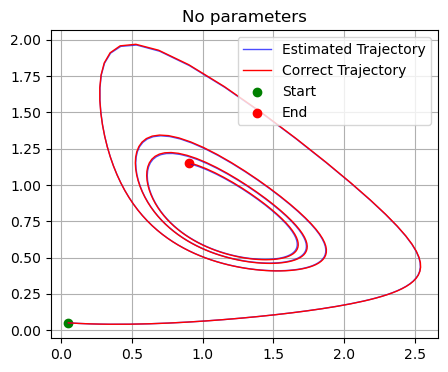

In [11]:
# evaluation
n_sample = 25
rmse_sigma, _ = SINDy_data.evaluate_RMSE(model, ode, freq, n_sample, ode.init_high, ode.init_low, dim_k)
print('Best Model RMSE: ', rmse_sigma)

n_sample = 1
title = r'No parameters'
SINDy_data.evaluate_traj(model, ode, freq, n_sample, [0.05, 0.05], [0.05, 0.05], dim_x, dim_k, title=title)